# CAPSTONE PROJECT 2 - COVID PREDICTIVE MODEL

# Introduction

A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website. The dataset contains of 2,78,848 reports of the individuals along with their symptoms from 11th March 2020 till 30th April 2020.

#### Features
There are 11 features of the dataset:

##### 1- Ind_Id
This indexes the data.

##### 2- Test_date
This provides the information about the date when RT-PCR test was conducted.

##### 3- Cough_symptoms
It shows if the patient has this symptom.

##### 4- Fever
It shows if the patient has this symptom.

##### 5- Sore_throat
It shows if the patient has this symptom.

##### 6- Shortness_of_breath
It shows if the patient has this symptom.

##### 7- Headache
It shows if the patient has this symptom.

##### 8- Corona
This feature provides the outcome of the RT-PCR test. i.e. if the patient is Covid Positive or Negative. 

##### 9- Age_60_above
It indicates if the patient is senior citizen or not.

##### 10- Sex
It provides information about the gender of the patient.

##### 11- Known_contact 
This feature is providing information regarding the point of contact of the virus. Whether it is from abroad or the patient has been in contact with the covid positive patient.

In [1]:
# import relevant/required libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Disabling warnings
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

In [2]:
# reading the dataset
df=pd.read_csv(r"C:\Users\Admin\Desktop\Bindu\Python\Projects\Capstone Project\corona_tested_006.csv")

# setting index 
df.set_index('Ind_ID', inplace=True)

In [3]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Ind_ID,,,,,,,,,,
1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278848 entries, 1 to 278848
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Test_date            278848 non-null  object
 1   Cough_symptoms       278848 non-null  object
 2   Fever                278848 non-null  object
 3   Sore_throat          278848 non-null  object
 4   Shortness_of_breath  278848 non-null  object
 5   Headache             278848 non-null  object
 6   Corona               278848 non-null  object
 7   Age_60_above         278848 non-null  object
 8   Sex                  278848 non-null  object
 9   Known_contact        278848 non-null  object
dtypes: object(10)
memory usage: 23.4+ MB


In [5]:
df.dtypes

Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [6]:
df.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [7]:
col=['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact']


In [8]:
df[col]=df[col].astype('category')
df['Test_date']=pd.to_datetime(df['Test_date'], format='%d-%m-%Y')

In [9]:
# df['Test_date'] = df['Test_date'].apply(dt.datetime.strptime, args=('%d-%m-%Y',))

In [10]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Ind_ID,,,,,,,,,,
1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [11]:
df.dtypes

Test_date              datetime64[ns]
Cough_symptoms               category
Fever                        category
Sore_throat                  category
Shortness_of_breath          category
Headache                     category
Corona                       category
Age_60_above                 category
Sex                          category
Known_contact                category
dtype: object

In [12]:
df.nunique()

Test_date              51
Cough_symptoms          5
Fever                   5
Sore_throat             5
Shortness_of_breath     5
Headache                5
Corona                  3
Age_60_above            3
Sex                     3
Known_contact           3
dtype: int64

In [13]:
# Checking the categories by grouping
for i in df.columns:
    a=df.groupby(i)
    print(a.size())
    print('**************')
    

Test_date
2020-03-11      294
2020-03-12      634
2020-03-13      686
2020-03-14      609
2020-03-15      985
2020-03-16     1304
2020-03-17     1463
2020-03-18     1991
2020-03-19     2243
2020-03-20     1870
2020-03-21     1648
2020-03-22     3565
2020-03-23     3494
2020-03-24     4735
2020-03-25     5495
2020-03-26     6663
2020-03-27     5963
2020-03-28     5602
2020-03-29     5277
2020-03-30     5915
2020-03-31     7134
2020-04-01     8654
2020-04-02     8188
2020-04-03     8079
2020-04-04     5145
2020-04-05     7509
2020-04-06     5368
2020-04-07     5931
2020-04-08     4058
2020-04-09     4539
2020-04-10     5678
2020-04-11     4341
2020-04-12     5984
2020-04-13     8425
2020-04-14     6571
2020-04-15     7149
2020-04-16     9138
2020-04-17     7645
2020-04-18     6321
2020-04-19    10199
2020-04-20    10921
2020-04-21     9624
2020-04-22     9646
2020-04-23     8744
2020-04-24     7028
2020-04-25     5052
2020-04-26     6131
2020-04-27     7304
2020-04-28     6334
2020-04-29

### Observation

- We can see that the all the columns are object datatypes except 'Ind_ID' which is integer. 
- Also, though df.info() shows that all are non-null columns, but we can notice that there are many categories in almost all the columns as 'None'. 
- 'True' and 'False' have been mentioned in different cases in the columns, increasing the number of categories. 

# Treatment of null values

In [14]:
# replacing the "None" items to null values. 
df[col].replace("None",np.NaN, inplace=True)

In [15]:
df.dtypes

Test_date              datetime64[ns]
Cough_symptoms               category
Fever                        category
Sore_throat                  category
Shortness_of_breath          category
Headache                     category
Corona                       category
Age_60_above                 category
Sex                          category
Known_contact                category
dtype: object

In [16]:
# confirming if all "None" have been replaced properly with "Nan". 
# This will show all the categories in the columns and now it should not show "None"
for i in df.columns:
    a=df.groupby(i)
    print(a.size())
    print('**************')

Test_date
2020-03-11      294
2020-03-12      634
2020-03-13      686
2020-03-14      609
2020-03-15      985
2020-03-16     1304
2020-03-17     1463
2020-03-18     1991
2020-03-19     2243
2020-03-20     1870
2020-03-21     1648
2020-03-22     3565
2020-03-23     3494
2020-03-24     4735
2020-03-25     5495
2020-03-26     6663
2020-03-27     5963
2020-03-28     5602
2020-03-29     5277
2020-03-30     5915
2020-03-31     7134
2020-04-01     8654
2020-04-02     8188
2020-04-03     8079
2020-04-04     5145
2020-04-05     7509
2020-04-06     5368
2020-04-07     5931
2020-04-08     4058
2020-04-09     4539
2020-04-10     5678
2020-04-11     4341
2020-04-12     5984
2020-04-13     8425
2020-04-14     6571
2020-04-15     7149
2020-04-16     9138
2020-04-17     7645
2020-04-18     6321
2020-04-19    10199
2020-04-20    10921
2020-04-21     9624
2020-04-22     9646
2020-04-23     8744
2020-04-24     7028
2020-04-25     5052
2020-04-26     6131
2020-04-27     7304
2020-04-28     6334
2020-04-29

In [17]:
# checking the count of null values in all the categories. This will guide us towards the approach of treating the null values.
df.isnull().sum()

Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [18]:
df['Sex'].mode()

0    female
Name: Sex, dtype: category
Categories (2, object): ['female', 'male']

In [19]:
df['Cough_symptoms'].mode()

0    False
Name: Cough_symptoms, dtype: category
Categories (4, object): [False, True, 'FALSE', 'TRUE']

In [20]:
df['Fever'].mode()

0    False
Name: Fever, dtype: category
Categories (4, object): [False, True, 'FALSE', 'TRUE']

##### Mode Imputation
- Filling the null values in the column 'Cough_symptoms' with the mode value. [0] refers to the first element of the Series
returned by the mode() as there could be multiple modes. Here in this scenario, although there are only two options
but have been written differently(which will be correctly later on), resulting in multiple modes. 
The reason we are using mode is that, it is a categorical variable, so mean can not be determined. Also, there are only
252 values that are missing in this column. Updating it with mode will not impact its essence.

In [21]:
# filling null with mode
df['Cough_symptoms'].fillna(df['Cough_symptoms'].mode()[0], inplace=True) 
df['Fever'].fillna(df['Fever'].mode()[0], inplace=True)
df['Shortness_of_breath'].fillna(df['Shortness_of_breath'].mode()[0], inplace=True)
df['Headache'].fillna(df['Headache'].mode()[0], inplace=True)
df['Sore_throat'].fillna(df['Sore_throat'].mode()[0], inplace=True)

##### Random Imputation
- Here we are updating the null values of column 'Sex' separately via 'Random Imputation'. We opted for this option because, both the categories i.e. 'male' and 'female' had almost the same count.

In [22]:
# imputing values randomly.
df['Sex'].fillna(np.random.choice(df['Sex']), inplace=True)

##### New Category
- As there is a substantial amount of data is missing in the column 'Age_60_above', updating it with mode may result in impacting the outcome. Hence we are updating the null values under this column as 'Unknown' by creating a new category in the column. 

In [23]:
# Creating the category as 'Unknown' and then updating the null values with the same.
df['Age_60_above']=df['Age_60_above'].cat.add_categories('Unknown')
df['Age_60_above'].fillna('Unknown', inplace=True)

In [24]:
# verifying the updation
df.isnull().sum()

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [25]:
# First replacing and unifying the categories, as same have been written in different cases.
mapper={'FALSE': False, 'TRUE': True}
df.replace(mapper, inplace=True)

## Analysis
##### Univariate Analysis

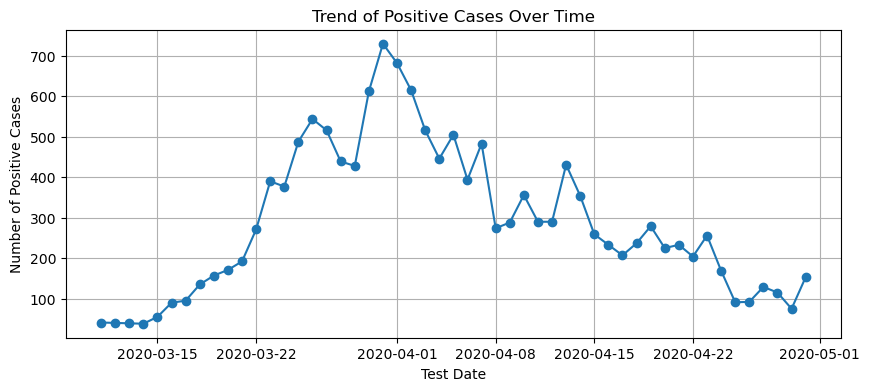

In [26]:
# Filtering positive cases from the 'Corona' column
positive=df[df['Corona']=='positive']

#group as per test date and size it 
positive_count=positive.groupby('Test_date').size().reset_index(name='Positive Cases')

# Creating line plot and formatting it.
plt.figure(figsize=(10, 4))
plt.plot(positive_count['Test_date'], positive_count['Positive Cases'], marker='o', linestyle='-')
plt.title('Trend of Positive Cases Over Time')
plt.xlabel('Test Date')
plt.ylabel('Number of Positive Cases')
plt.grid(True)
plt.show()

The above figure depicts that positive cases were on a rise in the month of May-2020. It was at its peak on 01-Apr-2020. Eventually, it started dipping after this.

<AxesSubplot:xlabel='Corona', ylabel='count'>

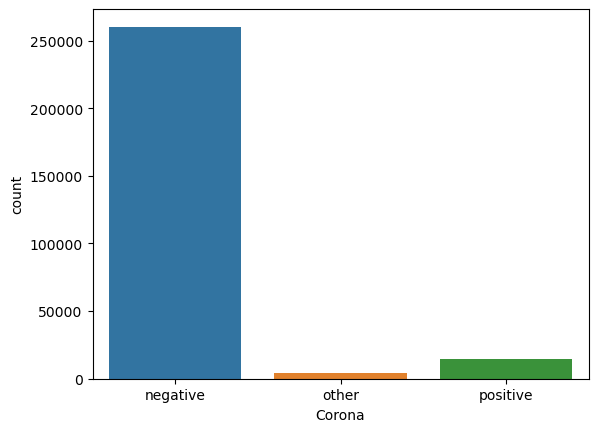

In [27]:
sns.countplot(data=df, x='Corona')

In [28]:
df['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

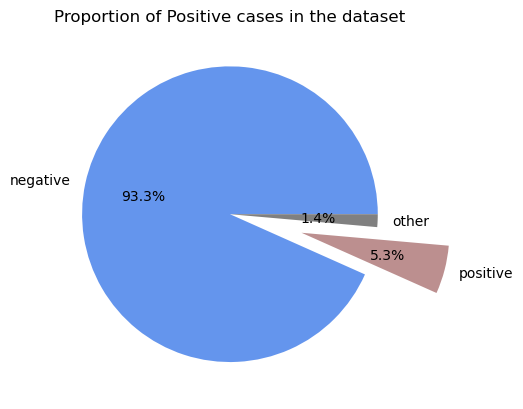

In [29]:
# Deriving data for pie chart.
sizes=df['Corona'].value_counts().values   #values of each unique occurence
labels=df['Corona'].value_counts().index  # category index set as labels of the slices
colors=['cornflowerblue', 'rosybrown', 'gray']

#Creating the chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=[0,0.5,0])
plt.title('Proportion of Positive cases in the dataset')
plt.show

The above pie chart shows that only 5.3% out of all the test have resulted as 'positive' which means Corona infected. This shows not all majority i.e. 93% of the reports outcome is negative and only about 5.3% were positive out of 278847 test that were conducted in the duration of March and April. As there are only 1.4% of the data which is positive, we are changing it to 'negative' to simplify the target variable. It will help in training the model and will reduce any confusion.

In [28]:
# replacing 'other' in the target column 'Corona' with 'mode' of the column which is negative.
mode_val=df['Corona'].mode()[0]
df['Corona'].replace('other', mode_val, inplace=True)


In [29]:
# Verifying the replacement.
df['Corona'].value_counts()

negative    264119
positive     14729
Name: Corona, dtype: int64

##### Bivariate Analysis

<Figure size 1400x3000 with 0 Axes>

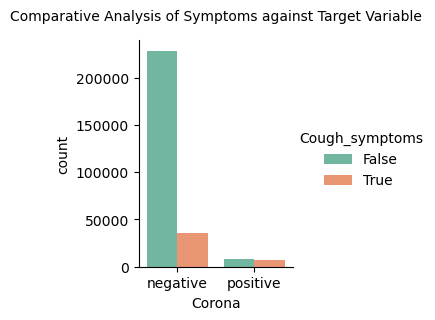

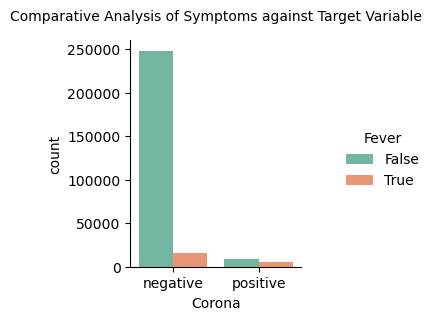

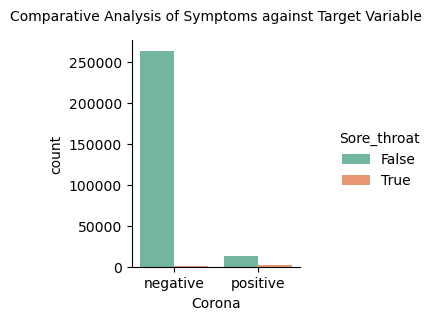

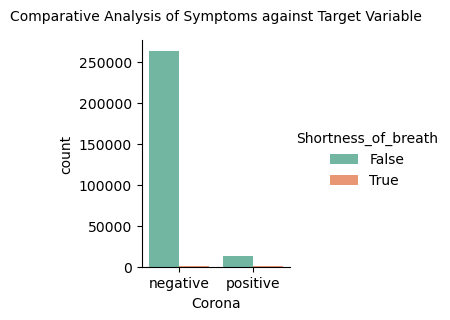

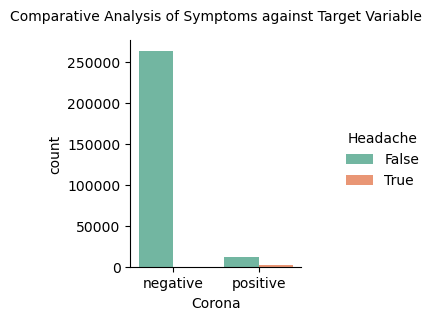

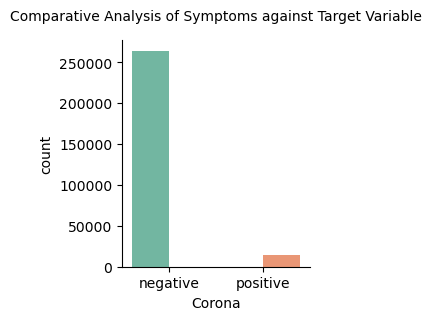

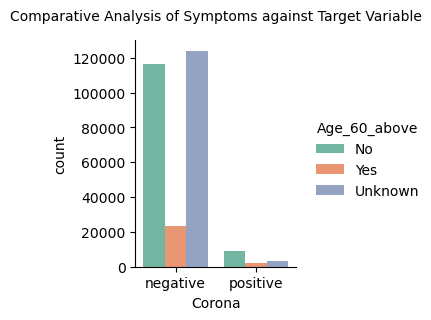

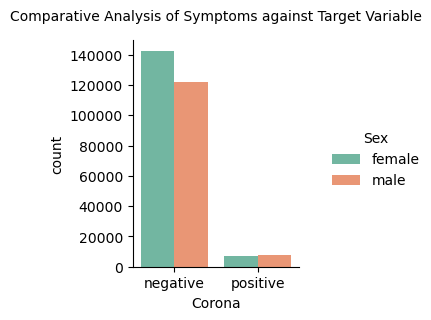

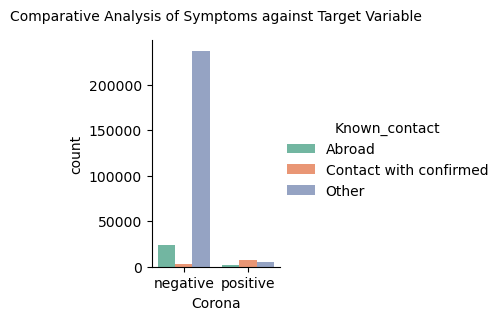

In [32]:
# Analyzing all the variables against the target variable i.e. 'Corona'
cat_col=df.select_dtypes('category')
plt.figure(figsize=(14,30))

for i in cat_col:
    sns.catplot(x='Corona', kind='count', data=df, hue=i, height=3, aspect=1, palette='Set2');
    plt.title('Comparative Analysis of Symptoms against Target Variable', y=1.05, size=10)
    plt.show()

- We can derive from the above graphical view that the 'Cough' and 'Fever' are common symptoms in Corona positive patients whereas other symptoms like 'Sore_throat', 'Shortness_of_breath' and 'Headache' have not been recorded. 
- Also mostly recorded cases are below the age of 60. However, there is a noticeable big chunk which is not known. 
- Number of males have been infected more as compared to number of females.
- Only a few have contracted from 'Abroad'. Most of the positive cases have been due to 'contact with the confirmed' case patient.

# One Hot Encoding

In [30]:
for i in df.columns:
    a=df.groupby(i)
    print(a.size())
    print('*******************')

Test_date
2020-03-11      294
2020-03-12      634
2020-03-13      686
2020-03-14      609
2020-03-15      985
2020-03-16     1304
2020-03-17     1463
2020-03-18     1991
2020-03-19     2243
2020-03-20     1870
2020-03-21     1648
2020-03-22     3565
2020-03-23     3494
2020-03-24     4735
2020-03-25     5495
2020-03-26     6663
2020-03-27     5963
2020-03-28     5602
2020-03-29     5277
2020-03-30     5915
2020-03-31     7134
2020-04-01     8654
2020-04-02     8188
2020-04-03     8079
2020-04-04     5145
2020-04-05     7509
2020-04-06     5368
2020-04-07     5931
2020-04-08     4058
2020-04-09     4539
2020-04-10     5678
2020-04-11     4341
2020-04-12     5984
2020-04-13     8425
2020-04-14     6571
2020-04-15     7149
2020-04-16     9138
2020-04-17     7645
2020-04-18     6321
2020-04-19    10199
2020-04-20    10921
2020-04-21     9624
2020-04-22     9646
2020-04-23     8744
2020-04-24     7028
2020-04-25     5052
2020-04-26     6131
2020-04-27     7304
2020-04-28     6334
2020-04-29

# Algorithm- Logistic Regression

In [31]:
# Dropping 'Test_date' from df for initiating One Hot Encoding
df_1=df.drop('Test_date', axis=1)
df['Test_date']

Ind_ID
1        2020-03-11
2        2020-03-11
3        2020-03-11
4        2020-03-11
5        2020-03-11
            ...    
278844   2020-04-30
278845   2020-04-30
278846   2020-04-30
278847   2020-04-30
278848   2020-04-30
Name: Test_date, Length: 278848, dtype: datetime64[ns]

In [32]:
# importing train-test split, and all the required libraries for Model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# Creating the object for one hot encoding
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False, drop='first', dtype=np.int32)

In [34]:
# fitting and transforming our dataset into ohe to encode
df_encoded=pd.DataFrame(ohe.fit_transform(df_1), columns=ohe.get_feature_names_out(df_1.columns))

# resetting the index of the new formed dataset as it is not in sync with the original dataset where the index was set to 'Ind_id'
# By doing so, we will receive the dataset which will be starting from 0 and thereafter we will add one to the index to initiate 
# it with indexing starting from 1.
df_encoded.reset_index(drop=True, inplace=True)
df_encoded.index = df_encoded.index + 1

In [35]:
df_encoded.head()

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Corona_positive,Age_60_above_Unknown,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
1,1,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,0,1,1,0,1,0,0
3,0,1,0,0,0,1,1,0,1,0,0
4,1,0,0,0,0,0,1,0,1,0,0
5,1,0,0,0,0,0,1,0,1,1,0


In [36]:
# Concatenating the 'Test_date' from the original dataset to encoded dataset i.e. df_encoded.
df_processed=pd.concat([df[['Test_date']],df_encoded], axis=1)
df_processed.head()

,Test_date,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Corona_positive,Age_60_above_Unknown,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
1,2020-03-11,1,0,1,0,0,0,1,0,1,0,0
2,2020-03-11,0,1,0,0,0,1,1,0,1,0,0
3,2020-03-11,0,1,0,0,0,1,1,0,1,0,0
4,2020-03-11,1,0,0,0,0,0,1,0,1,0,0
5,2020-03-11,1,0,0,0,0,0,1,0,1,1,0


In [37]:
# Sorting the new found dataset as per 'Test_date', to finally splitting it as per the required guidelines.
df_pro_sort=df_processed.sort_values(by='Test_date')

# splitting the dataset into train-validation and test.
train_val_data=df_pro_sort[df_pro_sort['Test_date'].between('2020-03-11', '2020-04-15')]
test_data=df_pro_sort[df_pro_sort['Test_date'].between('2020-04-16', '2020-04-30')]

# Separating the dependent and independent variables.
x=train_val_data.drop(['Corona_positive', 'Test_date'], axis=1)    # independent variables
y=train_val_data['Corona_positive']                                # Dependent/Target variable

# Splitting train-validation set to train and validation using train_test_split.
# Train and validation as per the requirement was supposed to be in the ration of 4:1, 
# which means train data should be 4/5(0.8) and validation data should be 1/5(0.2). Hence the test_size is set to be 0.2.
X_train, X_val, Y_train, Y_val=train_test_split(x,y, test_size=0.2, random_state=101)

In [38]:
file_path= r"C:\Users\Admin\Desktop\Bindu\Python\Projects\Capstone Project\Corona_tested_clean.csv"
df_pro_sort.to_csv(file_path, index=False)

In [39]:
# Creating object for the model
model= LogisticRegression()

In [40]:
# Fitting the training dataset in the model
model.fit(X_train, Y_train)

LogisticRegression()

In [41]:
# Predicting the target variable as per the model on the validation dataset.
y_predict=model.predict(X_val)

In [42]:
# Checking the shapes of all the split datasets to check for any mismatch.
print("X_train", X_train.shape)
print("X_val", X_val.shape)
print("Y_train", Y_train.shape)
print("Y_val", Y_val.shape)

X_train (130551, 10)
X_val (32638, 10)
Y_train (130551,)
Y_val (32638,)


### Evaluation Metrics

In [43]:
# Evaluating the model by checking the accuracy
accuracy=accuracy_score(Y_val, y_predict)
classification=classification_report(Y_val, y_predict)
cmat=confusion_matrix(Y_val, y_predict)
print("classification: ")
print(classification)

classification: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     30252
           1       0.74      0.44      0.55      2386

    accuracy                           0.95     32638
   macro avg       0.85      0.71      0.76     32638
weighted avg       0.94      0.95      0.94     32638



* The above matrices show an accuracy of 95 % which means our model is able to predict the target variable. 
* However, with further evaluating through classification report and confusion matrix, it suggests that class '0' i.e. negative class is predicted with high precision which 96%. Precision for positive class is 75%.
* Confusion Matrix further provides descriptive numbers of the True_positives which is 29859.
* It seems that we have build a good model. However, it seems to be predicting effectively on one class of the dataset. 

In [44]:
# Testing the model on the unseen data i.e. the test_data. We trained the model on train data and validated on train_val. 
# Evaluating the model's performance on the test_data.

In [45]:
test_data.shape

(115659, 12)

In [46]:
x_t=test_data.drop(['Corona_positive', 'Test_date'], axis=1) # Independent variable
y_t=test_data['Corona_positive']     # Dependent/Target variable 

In [47]:
# checking the shape of the data to verify the dimensions, if it is matching the train data.
print(x_t.shape)
print(y_t.shape)

(115659, 10)
(115659,)


In [48]:
# Making prediction on the test data independent variable.
test_predictions=model.predict(x_t)

In [49]:
# Evaluating the accuracy on the test data.
test_accuracy=accuracy_score(y_t, test_predictions)
test_classification=classification_report(y_t, test_predictions)
test_confusion_matrix=confusion_matrix(y_t, test_predictions)
print("classification:")
print(test_classification)

classification:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    112961
           1       0.68      0.12      0.21      2698

    accuracy                           0.98    115659
   macro avg       0.83      0.56      0.60    115659
weighted avg       0.97      0.98      0.97    115659



* The model seems to perform well in terms of accuracy which is 98%. However, the model struggles to correctly identify instances of the positive class. 
* We need to explore other algorithms to see if the accuracy and precision both improve.

# Decision Tree

In [50]:
# import the classifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
# creating object for the model
model_DTC=DecisionTreeClassifier()

In [52]:
# fitting the training data to the model
model_DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [53]:
# predicting the the values on the validation dataset.
y_pred = model_DTC.predict(X_val)

In [54]:
# Comparing the accuracy of the train and validation dataset on prediction
print("Train Accuracy:")
print(classification_report(Y_train, model_DTC.predict(X_train)))
print("********************")
print("Validation Accuracy:")
print(classification_report(Y_val, y_pred))

Train Accuracy:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    120906
           1       0.80      0.59      0.68      9645

    accuracy                           0.96    130551
   macro avg       0.89      0.79      0.83    130551
weighted avg       0.96      0.96      0.96    130551

********************
Validation Accuracy:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30252
           1       0.78      0.56      0.65      2386

    accuracy                           0.96     32638
   macro avg       0.87      0.77      0.81     32638
weighted avg       0.95      0.96      0.95     32638



In [59]:
# visual representation of the model.
from sklearn.tree import plot_tree

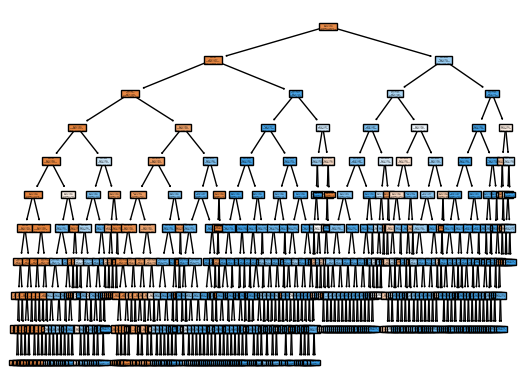

In [60]:
plot_tree(model_DTC, filled=True, node_ids=True);

The above model is able to give 97% precision on class 0 i.e negative and 81% on class 1 i.e. positive on the training dataset. On the validation dataset, the precision is 97% on class 0 and 78% on class 1. However the accuracy seems to be the same for both Train and Validation datasets which is 96%. This seems to be fair model, however, it seems to have longer decision paths. We can try pruning/regularize the model to improvise.

### Model Pruning

In [55]:
# regularizing the model by making amendments in the criterias.
reg_dtree=DecisionTreeClassifier(max_depth=50, min_samples_leaf=100, min_samples_split=1000, random_state=123)

In [56]:
# Fitting the model
reg_dtree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=50, min_samples_leaf=100,
                       min_samples_split=1000, random_state=123)

In [57]:
# Making the prediction on the validation dataset.
reg_predict=reg_dtree.predict(X_val)

In [58]:
# Finding the importance of all the features in the model
imp_df=pd.DataFrame(reg_dtree.feature_importances_, index=X_train.columns).rename({0:'Importances'}, axis=1).sort_values(by='Importances', ascending=False)

In [59]:
# Cumulative importance of the features in the model
imp_df['cumulative']=round(imp_df['Importances'].cumsum(), 2)
imp_df

,Importances,cumulative
Known_contact_Contact with confirmed,0.606856,0.61
Headache_True,0.197283,0.80
Fever_True,0.062417,0.87
Sore_throat_True,0.044878,0.91
Shortness_of_breath_True,0.034104,0.95
Cough_symptoms_True,0.026118,0.97
Known_contact_Other,0.012675,0.98
Age_60_above_Yes,0.007840,0.99
Age_60_above_Unknown,0.003984,1.00
Sex_male,0.003846,1.00


The feature 'Known_contact_Contact with confirmed' has been given highest importance in the model which is 61%. There after 'Headache_True', 'Fever_True', 'Sore_throat_True', 'Shortness_of_breath_True' combined together make it 94% to make prediction.

In [60]:
# Comparing the Train and Validation accuracy. 
print("Train Accuracy:")
print(classification_report(Y_train, reg_dtree.predict(X_train)))
print("************************")
print("Validation Accuracy:")
print(classification_report(Y_val, reg_predict))

Train Accuracy:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    120906
           1       0.78      0.57      0.66      9645

    accuracy                           0.96    130551
   macro avg       0.87      0.78      0.82    130551
weighted avg       0.95      0.96      0.95    130551

************************
Validation Accuracy:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     30252
           1       0.76      0.54      0.63      2386

    accuracy                           0.95     32638
   macro avg       0.86      0.77      0.80     32638
weighted avg       0.95      0.95      0.95     32638



After pruning, the precision for class 1 i.e. positive on train data has improved to 81%  and on the validation dataset, it has decreased a bit to 76% which is a 2% drop. But eventually, the model is still an improved version, having shorter decision paths as shown in the below decision tree plot. 

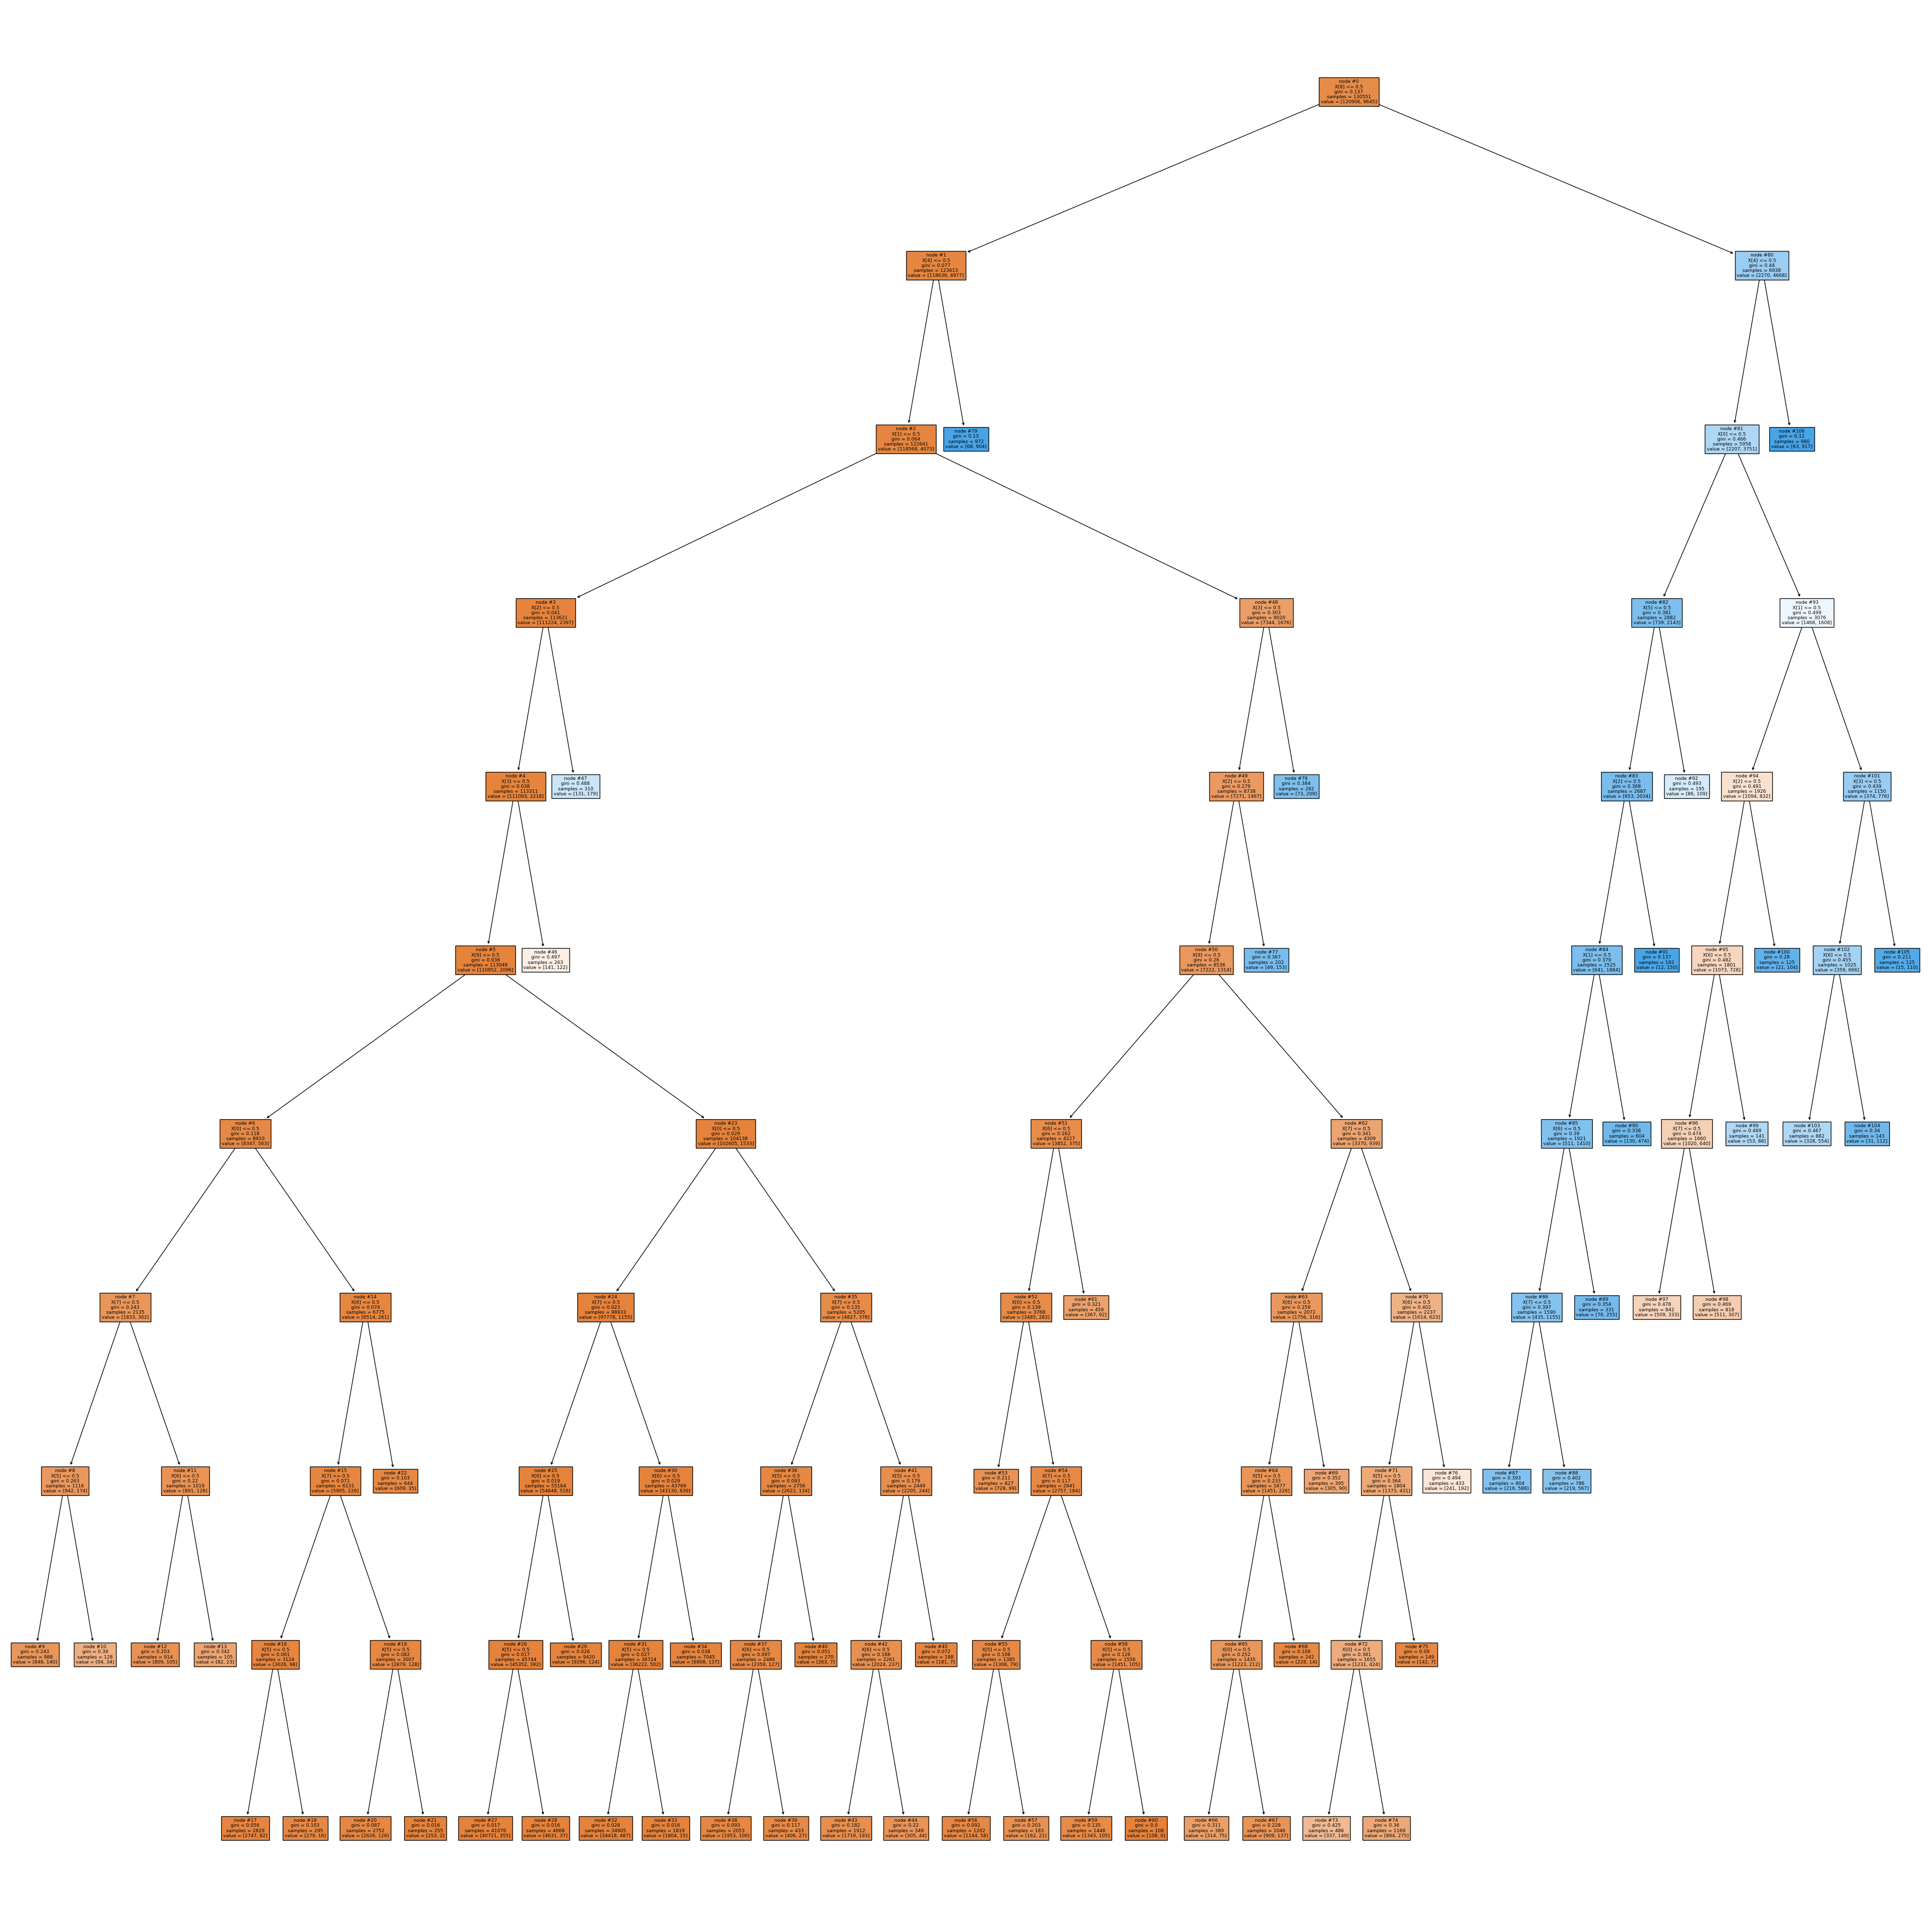

In [67]:
# Visual representation of the Pruned model.
plt.figure(figsize=(50,50))
plot_tree(reg_dtree, filled=True, node_ids=True);

In [61]:
# Testing the model on the unseen dataset i.e. the test data.
test_predict=reg_dtree.predict(x_t)

In [62]:
print('Test Accuracy:')
print(classification_report(y_t, test_predict))

Test Accuracy:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.77      0.44      0.56      2698

    accuracy                           0.98    115659
   macro avg       0.88      0.72      0.77    115659
weighted avg       0.98      0.98      0.98    115659



With 98% accuracy and precision of 99% on the class 0 and 77% on class 1, model is able to capture positive cases most of the time. Recall (ration of true positive predictions to the total actual positives) for class 1 is 44 %, which was 57 and 54% in the train and validation data. Recall shows the capability of the model to capture all the positive instances. It is 100 % for the negative cases but for positive class, it is not able to predict even 50% 
The model is demonstrating very high accuracy, precision and recall for the negative class i.e.0. This means that it is able to predict negative scenarios with high confidence. However, for positive class i.e. 1, it is relatively low.
We should explore some other algorithm to improvise the model. We will try Random Forest to improve the predictions.

# Random Forest

In [63]:
# importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [64]:
rfcl=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=50, min_samples_leaf=100, min_samples_split=1000,
                           max_features= 4, oob_score=True)

In [65]:
rfcl.fit(X_train, Y_train)

RandomForestClassifier(max_depth=50, max_features=4, min_samples_leaf=100,
                       min_samples_split=1000, n_estimators=500,
                       oob_score=True)

In [109]:
# Making prediction on the train dataset with gsv model
rf_train_predict=rfcl.predict(X_train)

# Making prediction on the Validation dataset with gsv model
rf_val_predict=rfcl.predict(X_val)

In [110]:
print("Train Accuracy:")
print(classification_report(Y_train, rf_train_predict))
print("************************")
print("Validation Accuracy:")
print(classification_report(Y_val, rf_val_predict))

Train Accuracy:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    120906
           1       0.79      0.56      0.65      9645

    accuracy                           0.96    130551
   macro avg       0.88      0.77      0.81    130551
weighted avg       0.95      0.96      0.95    130551

************************
Validation Accuracy:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     30252
           1       0.77      0.53      0.63      2386

    accuracy                           0.95     32638
   macro avg       0.86      0.76      0.80     32638
weighted avg       0.95      0.95      0.95     32638



In [112]:
# Testing the model on the unseen dataset i.e. the test data.
test_predict_rfcl=rfcl.predict(x_t)

In [132]:
# Accuracy of the test predictions
print('Test Accuracy:')
print(classification_report(y_t, test_predict_rfcl))

Test Accuracy:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.77      0.44      0.56      2698

    accuracy                           0.98    115659
   macro avg       0.88      0.72      0.77    115659
weighted avg       0.98      0.98      0.98    115659



The above model shows overall accuracy of 95% on Validation data and 98% on the unseen data. However, the recall has declined from 56 to 44 % in the test data. Let's try and see if we can improvise the model by finding the best parameters for the model where the accuracy metrics can provide better results.

### Hyperparameter Tuning via GridSearchCV

In [134]:
# As the grid search is not responding with too many parameters, 
# I have tried creating two sets for the same and then applied the grid search separately.

In [72]:
# Setting some parameters. Set 1
params={'n_estimators': [200, 300,500], 'criterion':['gini'],
        'max_depth':[40, 60], 'min_samples_leaf':[500, 700],
        'min_samples_split':[500, 1000], 'max_features':[3], 'class_weight':[None, 'balanced']}

In [80]:
# Setting other set of parameters. Set 2
params1={'n_estimators': [200, 300,500], 'criterion':['entropy'],
        'max_depth':[40, 60], 'min_samples_leaf':[500, 700],
        'min_samples_split':[500, 1000], 'max_features':[3], 'class_weight':[None, 'balanced']}

In [84]:
# Creating an object for the grid search for the random forest model with set 1
grid_search1=GridSearchCV(rfcl, param_grid=params, n_jobs=-1)

In [85]:
# Creating an object for the grid search for the random forest model with set 2
grid_search=GridSearchCV(rfcl, param_grid=params1, n_jobs=-1)

In [86]:
# Fitting the training dataset 
grid_search1.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=50, max_features=4,
                                              min_samples_leaf=100,
                                              min_samples_split=1000,
                                              n_estimators=500,
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini'], 'max_depth': [40, 60],
                         'max_features': [3], 'min_samples_leaf': [500, 700],
                         'min_samples_split': [500, 1000],
                         'n_estimators': [200, 300, 500]})

In [87]:
# Fitting the training dataset
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=50, max_features=4,
                                              min_samples_leaf=100,
                                              min_samples_split=1000,
                                              n_estimators=500,
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['entropy'], 'max_depth': [40, 60],
                         'max_features': [3], 'min_samples_leaf': [500, 700],
                         'min_samples_split': [500, 1000],
                         'n_estimators': [200, 300, 500]})

In [95]:
# Retrieving best parameter combination
best_params=pd.Series(grid_search.best_params_)
best_params1=pd.Series(grid_search1.best_params_)
print('Best Parameters with Criterion "Entropy" :')
print(best_params)
print( )
print('**************')
print( )
print('Best Parameters with Criterion "Gini" :')
print(best_params1)

Best Parameters with Criterion "Entropy" :
class_weight            None
criterion            entropy
max_depth                 60
max_features               3
min_samples_leaf         500
min_samples_split        500
n_estimators             300
dtype: object

**************

Best Parameters with Criterion "Gini" :
class_weight         None
criterion            gini
max_depth              40
max_features            3
min_samples_leaf      500
min_samples_split     500
n_estimators          500
dtype: object


### Entropy Model

In [105]:
#creating model with best parameters
rfcl_gsv=RandomForestClassifier(**best_params)

# fitting the model on training dataset
rfcl_gsv.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=60, max_features=3,
                       min_samples_leaf=500, min_samples_split=500,
                       n_estimators=300)

In [106]:
# Making prediction on the train dataset with gsv model
gsv_train_predict=rfcl_gsv.predict(X_train)

# Making prediction on the Validation dataset with gsv model
gsv_val_predict=rfcl_gsv.predict(X_val)

In [107]:
# Finding out which feature has been given more importance in the model.
# Creating a dataframe for the same.
rfcl_gsv_imp= pd.DataFrame(rfcl_gsv.feature_importances_, index=X_train.columns).rename({0:'Importances'}, axis=1).sort_values(by='Importances',
                                                                                                             ascending=False)
# Creating a column with name 'cumsum' in the dataframe, showing cumulative percentage.
rfcl_gsv_imp['cumsum']=round(rfcl_gsv_imp['Importances'].cumsum(),2)
rfcl_gsv_imp

,Importances,cumsum
Known_contact_Contact with confirmed,0.413591,0.41
Known_contact_Other,0.217324,0.63
Fever_True,0.161860,0.79
Headache_True,0.090914,0.88
Cough_symptoms_True,0.082757,0.97
Sore_throat_True,0.021496,0.99
Age_60_above_Yes,0.003938,0.99
Shortness_of_breath_True,0.003413,1.00
Sex_male,0.003091,1.00
Age_60_above_Unknown,0.001616,1.00


This model is also showing the same pattern as the Decision Tree model where highest weightage was given to 'Known_contact_Contact with confirmed', however percentage here is 41%. 'Headache_True', 'Known_contact_Other', 'Fever_True', 'Sore_throat_True', 'Shortness_of_breath_True', Cough_symptoms collectively make 97%. 

In [111]:
# Comparing the Train and Validation accuracy. 
print("Grid_search Train Accuracy:")
print(classification_report(Y_train, gsv_train_predict))
print("************************")
print("Grid_search Validation Accuracy:")
print(classification_report(Y_val, gsv_val_predict))

Grid_search Train Accuracy:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    120906
           1       0.77      0.43      0.55      9645

    accuracy                           0.95    130551
   macro avg       0.87      0.71      0.76    130551
weighted avg       0.94      0.95      0.94    130551

************************
Grid_search Validation Accuracy:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     30252
           1       0.76      0.42      0.54      2386

    accuracy                           0.95     32638
   macro avg       0.86      0.71      0.76     32638
weighted avg       0.94      0.95      0.94     32638



In [123]:
# prediction on the test data
gsv_test_predict=rfcl_gsv.predict(x_t)

In [127]:
# Checking accuracy
print("GSV Test prediction based on Entropy and other best params:  ")
print( )
print(classification_report(y_t, gsv_test_predict))

GSV Test prediction based on Entropy and other best params:  

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.78      0.43      0.56      2698

    accuracy                           0.98    115659
   macro avg       0.88      0.72      0.77    115659
weighted avg       0.98      0.98      0.98    115659



The above model with Entropy criterion doesn't seem to have shown any major difference. The accuracy seem to be the same as we had with our original model 'rfcl'. Although the precision increased by 1 % and declined 1 % for recall for the positive class.

### Gini Model

In [114]:
#creating model with best parameters of model with criterion as Gini
rfcl_gsv1=RandomForestClassifier(**best_params1)

# fitting the model on training dataset
rfcl_gsv1.fit(X_train, Y_train)

RandomForestClassifier(max_depth=40, max_features=3, min_samples_leaf=500,
                       min_samples_split=500, n_estimators=500)

In [115]:
# Making prediction on the train dataset with gsv model
gsv1_train_predict=rfcl_gsv1.predict(X_train)

# Making prediction on the Validation dataset with gsv model
gsv1_val_predict=rfcl_gsv1.predict(X_val)

In [116]:
# Finding out which feature has been given more importance in the model.
# Creating a dataframe for the same.
rfcl_gsv1_imp= pd.DataFrame(rfcl_gsv1.feature_importances_, index=X_train.columns).rename({0:'Importances'}, axis=1).sort_values(by='Importances',
                                                                                                             ascending=False)
# Creating a column with name 'cumsum' in the dataframe, showing cumulative percentage.
rfcl_gsv1_imp['cumsum']=round(rfcl_gsv1_imp['Importances'].cumsum(),2)
rfcl_gsv1_imp

,Importances,cumsum
Known_contact_Contact with confirmed,0.501523,0.50
Headache_True,0.147879,0.65
Known_contact_Other,0.134062,0.78
Fever_True,0.114248,0.90
Cough_symptoms_True,0.049200,0.95
Sore_throat_True,0.030170,0.98
Shortness_of_breath_True,0.015578,0.99
Age_60_above_Yes,0.003431,1.00
Sex_male,0.002626,1.00
Age_60_above_Unknown,0.001283,1.00


This model is allocating 50% importance to the 'Contact with confirmed'. Collectively, first four symptoms i.e. 'Known_contact_Contact with confirmed', 'Headache_True', 'Known_contact_Other' and 'Fever_True' make 90%.

In [117]:
# Comparing the Train and Validation accuracy. 
print("Grid_search Train Accuracy:")
print(classification_report(Y_train, gsv_train_predict))
print("************************")
print("Grid_search Validation Accuracy:")
print(classification_report(Y_val, gsv_val_predict))

Grid_search Train Accuracy:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    120906
           1       0.77      0.43      0.55      9645

    accuracy                           0.95    130551
   macro avg       0.87      0.71      0.76    130551
weighted avg       0.94      0.95      0.94    130551

************************
Grid_search Validation Accuracy:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     30252
           1       0.76      0.42      0.54      2386

    accuracy                           0.95     32638
   macro avg       0.86      0.71      0.76     32638
weighted avg       0.94      0.95      0.94     32638



In [130]:
# Prediction on the test data
gsv1_test_predict=rfcl_gsv1.predict(x_t)

In [131]:
# Checking accuracy
print('GSV Test prediction based on Gini and other best params:')
print( )
print(classification_report(y_t, gsv1_test_predict))

GSV Test prediction based on Entropy and other best params:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.78      0.43      0.56      2698

    accuracy                           0.98    115659
   macro avg       0.88      0.72      0.77    115659
weighted avg       0.98      0.98      0.98    115659



The model is able to predict 99% for class negative and 78% for class positive with overall accuracy of 98% on unseen data.
The precision is decent, suggesting that when the model predicts the positive class, it is often correct. However, the recall is relatively lower, indicating that the model may not be capturing all positive instances.

Moreover, there doesn't seem to be any evident difference in the Gini or Entropy. The test prediction are absolutely the same for Gini and Entropy.

We can definitely go with the 'rfcl' model which we creating initially. 

# KNN

In [81]:
# importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [82]:
# Creating Object for the model with number of nearest neighboring points to consider as 10
knn=KNeighborsClassifier(n_neighbors=19)

# Fitting the training dataset
knn.fit(X_train,Y_train)

# Making Prediction on the  training dataset
knn_train_predict=knn.predict(X_train)

# Making prediction on teh validation dataset
knn_val_predict=knn.predict(X_val)


In [83]:
for i in range(20):
    if i>=2:
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, Y_train)
        print("Accuracy for k Value:", i)
        print(classification_report(Y_train, knn.predict(X_train)))
        print("  ")
        print("*********************")

Accuracy for k Value: 2
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    120906
           1       0.72      0.48      0.57      9645

    accuracy                           0.95    130551
   macro avg       0.84      0.73      0.77    130551
weighted avg       0.94      0.95      0.94    130551

  
*********************
Accuracy for k Value: 3
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    120906
           1       0.70      0.58      0.63      9645

    accuracy                           0.95    130551
   macro avg       0.83      0.78      0.80    130551
weighted avg       0.95      0.95      0.95    130551

  
*********************
Accuracy for k Value: 4
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    120906
           1       0.80      0.53      0.64      9645

    accuracy                           0.96    130551
   mac

The results show that the k value in the range of 17-19 result in good accuracy along with the precision and recall. with accuracy of 95 and 96%, precision is 72 and recall is 63 % of the class 1 (positive) as well which was hard to achieve in other algorithms. 

In [84]:
# Comparing the accuracy of predictions on train and validation dataset.
print("Train Accuracy: ")
print(classification_report(Y_train, knn_train_predict))
print("************************")
print("Validation Accuracy: ")
print(classification_report(Y_val, knn_val_predict))

Train Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    120906
           1       0.72      0.63      0.67      9645

    accuracy                           0.95    130551
   macro avg       0.85      0.81      0.82    130551
weighted avg       0.95      0.95      0.95    130551

************************
Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     30252
           1       0.71      0.60      0.65      2386

    accuracy                           0.95     32638
   macro avg       0.84      0.79      0.81     32638
weighted avg       0.95      0.95      0.95     32638



The above shows accuracy on the Train data and Validation data. The accuracy is approximately same on both the datase. It is based on the n_neighbors value of 19 which seems to have been fetching better results as per the search done above. Precision of class 1(positive) is above 70% and recall above 50%. We need to check if it brings in satisfactory results on test data too.

### KNN Model testing on Test data

In [85]:
# Checking the model on the test dataset.
knn_test_prediction = knn.predict(x_t)

In [86]:
# Checking the accuracy.
print(classification_report(y_t, knn_test_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.76      0.45      0.57      2698

    accuracy                           0.98    115659
   macro avg       0.87      0.73      0.78    115659
weighted avg       0.98      0.98      0.98    115659



On the Test data as well it shows an accuracy of 98%. It is working fairly good on the unseen data as well. However, this is just positioning algorithm and applying this on the medical outcome related Learning could be risky. 

# Cross Validation-Evaluation of the models

In [87]:
# import cross val score 
from sklearn.model_selection import cross_val_score

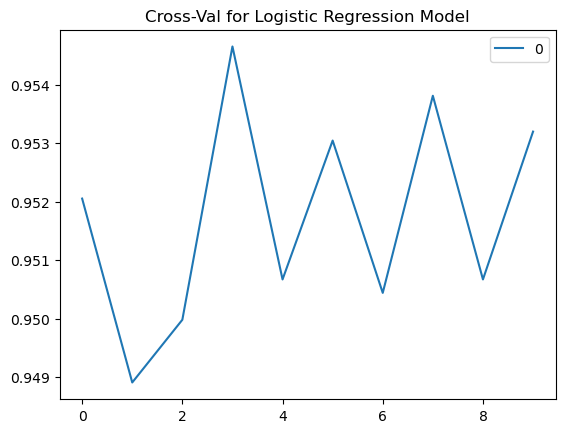

In [88]:
pd.DataFrame(cross_val_score(model, X_train, Y_train, cv=10)).plot()
plt.title("Cross-Val for Logistic Regression Model");

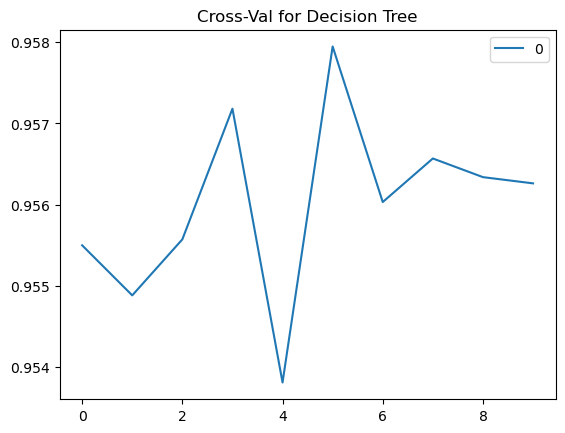

In [89]:
pd.DataFrame(cross_val_score(reg_dtree, X_train, Y_train, cv=10)).plot()
plt.title("Cross-Val for Decision Tree");

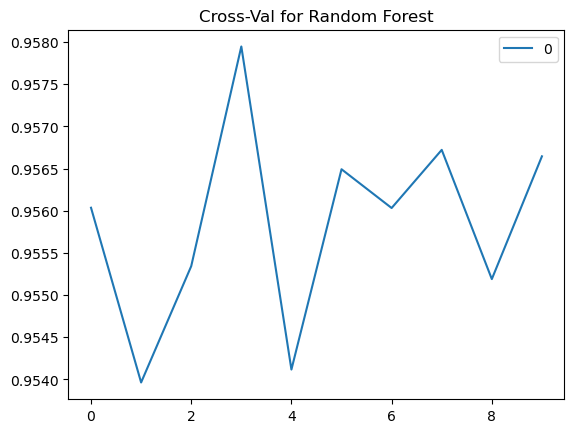

In [90]:
pd.DataFrame(cross_val_score(rfcl, X_train, Y_train, cv=10)).plot()
plt.title("Cross-Val for Random Forest");

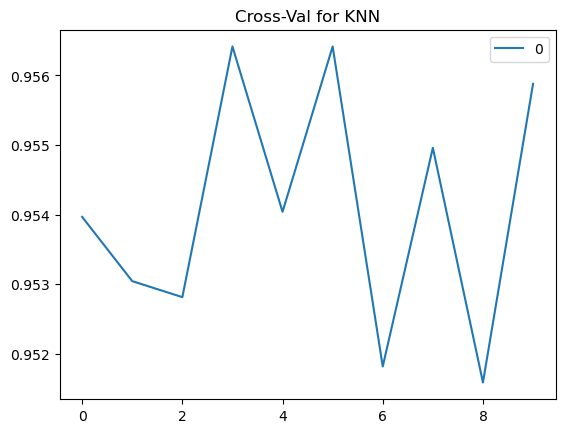

In [91]:
pd.DataFrame(cross_val_score(knn, X_train, Y_train, cv=10)).plot()
plt.title("Cross-Val for KNN");

In [92]:
print("Avg Cross Val Score for Logistic Reg:", round(pd.DataFrame(cross_val_score(model, X_train, Y_train, cv=10)).mean(),2))
print("***************")
print("Avg Cross Val Score for Reg Tree", round(pd.DataFrame(cross_val_score(reg_dtree, X_train, Y_train, cv=10)).mean(),2))
print("***************")
print("Avg Cross Val Score for Random Forest", round(pd.DataFrame(cross_val_score(rfcl, X_train, Y_train, cv=10)).mean(),2))
print("***************")
print("Avg Cross Val Score for KNN", round(pd.DataFrame(cross_val_score(knn, X_train, Y_train, cv=10)).mean(),2))

Avg Cross Val Score for Logistic Reg: 0    0.95
dtype: float64
***************
Avg Cross Val Score for Reg Tree 0    0.96
dtype: float64
***************
Avg Cross Val Score for Random Forest 0    0.96
dtype: float64
***************
Avg Cross Val Score for KNN 0    0.95
dtype: float64


# Conclusion:
By the over analysis of the models, we can make out that the all the models have almost same performance. All are persistently working well for class 'negative', but for class 'positive' recall seems to be at the lower side.

KNN:

Test data:

Accuracy - 98%

Precision –  negative 99%, positive 79%

Recall – negative 100%, positive 44%

It stands out amongst all the models, as this is performing well for class 'positive' too. It has good recall rate for both the classes which is not the case for all other models.It provides good precision too for both classes and accuracy too for overall model. Regarding the Test data, it is performing the same way as all the other algorithm, except Logistic regression. It has 79% precision 44% recall for class 'positive and 98 % accuracy. Though, it has good prediction rate, but continuing with KNN can't be a good approach in this scenario. KNN is a positioning alogorithm. It makes prediction based on the neighbouring data points.

____________________________________________________________________________________

Logistic Regression:

Test data:

Accuracy - 98%

Precision –  negative 98%, positive 68%

Recall – negative 100%, positive 12%

It is yielding good results for class 'negative'. It's precision and recall is good for validation data in for both classes. But the model is not working the same way on the unseen data i.e. test data. 
Recall on the test data for class ‘positive’ is only 12%. Recall is the proportion of true positive predictions among all actual positives and it measures the model's ability to identify all relevant instances. Considering all these points it becomes a very important evaluation metric for the model.
Eventually, we will not suggest to use model based on Logistic regression as an ideal model for our problem statement.

____________________________________________________________________________________

Decision Tree :

Test data:

Accuracy - 98%

Precision –  negative 99%, positive 77%

Recall – negative 100%, positive 44%

This model has undoubtedly performed well for Train-Validation as well as Test data.
 
____________________________________________________________________________________

Random Forest:

Test data:

Accuracy - 98%

Precision –  negative 99%, positive 77%

Recall – negative 100%, positive 44%

With further boosting the decision tree, we don’t see any further changes in the test evaluation metrics. It is the same as Decision Tree. However, with boosting we did see improvement in the Train-Validation evaluation metrics.

AVerage Cross Val Score for all the models are same except for Logistic Regression. For all the models, it is 96% and for Logistic model it is 95%. 
____________________________________________________________________________________

After all the analysis , Random Forest model rfcl seems a perfect model for the prediction.
